In [7]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

def criaDatasetBidimensionalNãoLinearmenteSeparável(n=20, n_classes=3):
    """
    Cria um dataset bidimensional multiclasse não linearmente separável.
    """
    X, y = make_blobs(n_samples=n, centers=n_classes**2, cluster_std=0.8)
    y = np.array(y%n_classes, dtype=int)
    return X, y

X, y = criaDatasetBidimensionalNãoLinearmenteSeparável(1000)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.9)

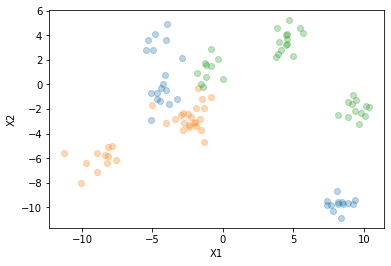

In [8]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

In [9]:
def define_axes(X):
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-.1, max1+.1, min2-.1, max2+.1]

def plot_predictions(clf, X):
    axes = define_axes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [10]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

In [11]:
def define_axes(X):
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-.1, max1+.1, min2-.1, max2+.1]

def plot_predictions(clf, X):
    axes = define_axes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

0.97
0.9288888888888889


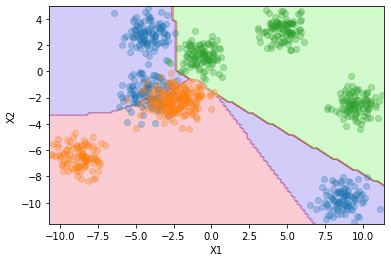

In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from sklearn.preprocessing import label_binarize

class MLP(BaseEstimator, ClassifierMixin):
    """
    Versão do MLP com uma camada oculta usando Keras.
    """
    def __init__(self, max_iter=1000, n_hidden=5):
        self.max_iter = max_iter
        self.n_hidden = n_hidden

    def fit(self, X, y):
        self.labels, ids = np.unique(y, return_inverse=True)
        yhot = keras.utils.to_categorical(ids)

        self.model = keras.models.Sequential()
        self.model.add(keras.layers.InputLayer(input_shape=(X.shape[1],)))

        self.model.add(keras.layers.Dense(self.n_hidden))
        self.model.add(keras.layers.Activation('relu'))

        self.model.add(keras.layers.Dense(yhot.shape[1]))
        self.model.add(keras.layers.Activation('softmax'))

        self.model.compile(loss='categorical_crossentropy')
        self.model.fit(X, yhot, epochs=self.max_iter, verbose=0)

    def predict_proba(self, X, y=None):
        return self.model.predict(X)
    
    def predict(self, X, y=None):
        predictions = self.model.predict(X)
        return self.labels[np.argmax(predictions,axis=1)]
        
mlp = MLP()
mlp.fit(Xtr, ytr)
print(accuracy(ytr, mlp.predict(Xtr)))
print(accuracy(yte, mlp.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plot_predictions(mlp, Xte)
plt.show()